In [58]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from matplotlib import pyplot as plt
import hyperopt.pyll.stochastic
import numpy as np

## Objective function

In [59]:
function=lambda x: (x**2) * 0.02* np.sin(x/10.)
def func(params):
    x = params['x']
    val = (x**2) * 0.02* np.sin(x/10.)
    return {'loss': val, 'status': STATUS_OK}

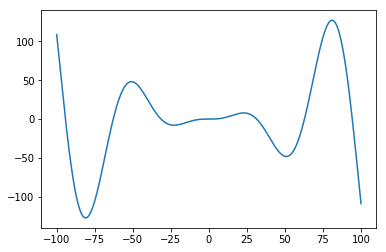

In [72]:
x = np.arange(-100, 100.1, 0.1)
params={}
params['x'] = x
plt.plot(x, func(params)['loss'])

## Optimization

In [74]:
fspace = {'x': hp.uniform('x', -100, 100)}
best = fmin(
    fn=func,
    space=fspace,
    algo=tpe.suggest,
    max_evals=50)
print('best', best)

best {'x': -81.400913672347}


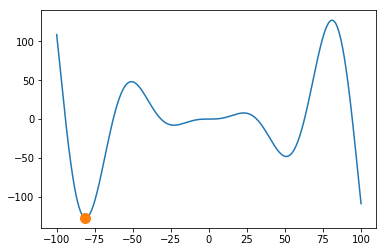

In [75]:
plt.plot(x, function(x))
plt.plot(best['x'], function(best['x']), marker='o', ms=10)

## Search space visualization

add trials

In [78]:
fspace = {'x': hp.uniform('x', -100, 100)}
trials = Trials()
best = fmin(
    fn=func,
    space=fspace,
    algo=tpe.suggest,
    max_evals=1000, trials=trials)
print('best', best)

best {'x': -80.97105463834629}


### Choice of optimization parameter over time

Text(0,0.5,'$x$')

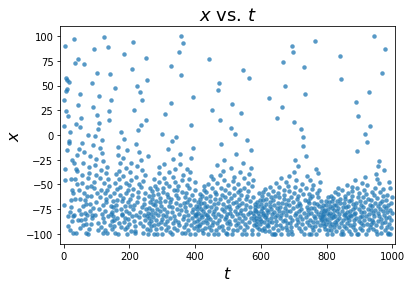

In [80]:
f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ vs. $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)